In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
spam_data = pd.read_csv("./Data/spam.csv",encoding = "ISO-8859-1")

1. Data Cleaning

In [5]:
spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
spam_data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
spam_data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
# Transform output to numbers 
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit
spam_data['target'] = encoder.fit_transform(spam_data['target'])

In [10]:
# missing value
spam_data.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# duplicate value
spam_data.duplicated().sum()

403

In [12]:
# remove duplicate
spam_data.drop_duplicates(keep='first',inplace=True)

In [13]:
spam_data.shape

(5169, 2)

2. EDA

In [14]:
spam_data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

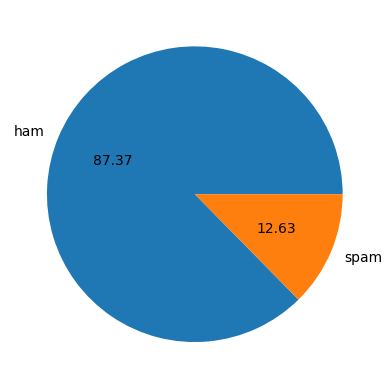

In [15]:
plt.pie(spam_data['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Summery of above pie chart:
1. data is imbalanced

Now we count chars,words,sentences in each test for that we use nltk

In [16]:
import nltk

In [17]:
nltk.download('punkt') # download extra dependencies

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Basic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

yaha ek dikkat hai ki space ko bhi characters me count kar liya hai, 
we can remove them with help of this logic : len("manuj m".replace(' ',''))

In [18]:
spam_data['num_characters'] = spam_data['text'].apply(len)

In [19]:
# num of words
spam_data['num_words'] = spam_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

this is just for learning not in main code

In [20]:
# num of words [nearest to nltk but still something error]
#this is simple split function split and above output is what nltk splits
f_count = []
for k in list(spam_data['text']):
    f_split = []
    for i in k.split(' '):
        temp1 = []
        temp2 = []
        for j in i:
            if j.isalpha() == True:
                temp1.append(j)
            else:
                temp2.append(j)
        if "".join(temp1) != "":
            f_split.append("".join(temp1))
        if "".join(temp2) != "":
            f_split.append("".join(temp2))
    f_count.append(len(f_split))
# print(f_count)

In [21]:
spam_data['num_sentences'] = spam_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
spam_data

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [23]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

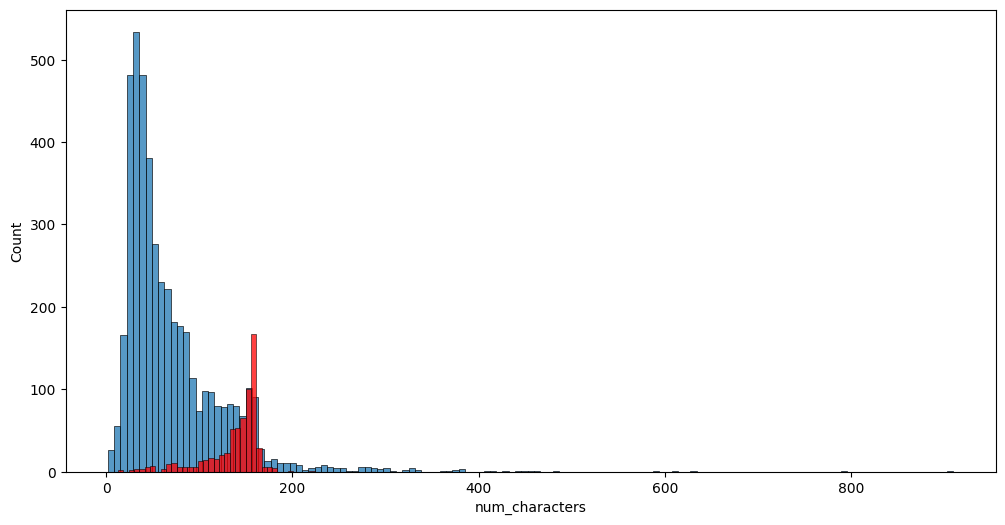

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(spam_data[spam_data['target']==0]['num_characters'])
sns.histplot(spam_data[spam_data['target']==1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

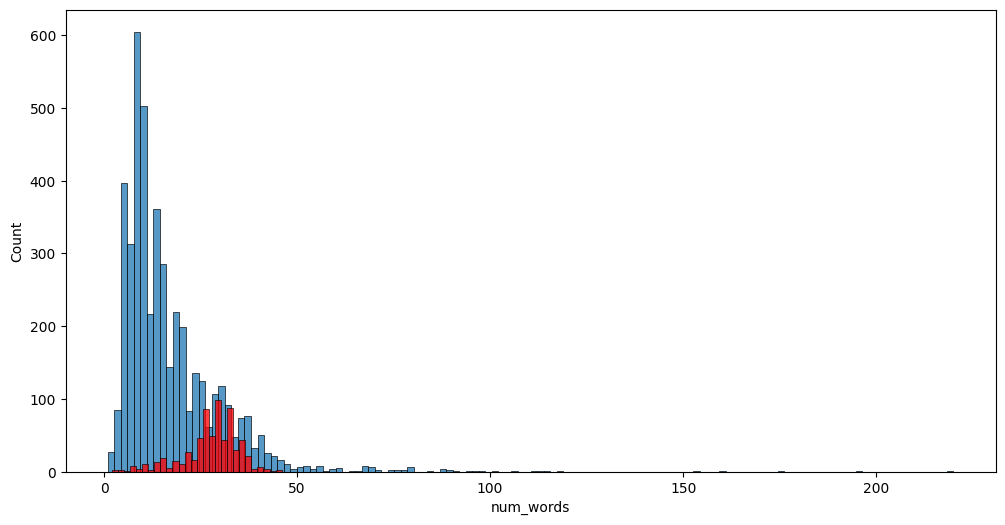

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(spam_data[spam_data['target']==0]['num_words'])
sns.histplot(spam_data[spam_data['target']==1]['num_words'],color='red')

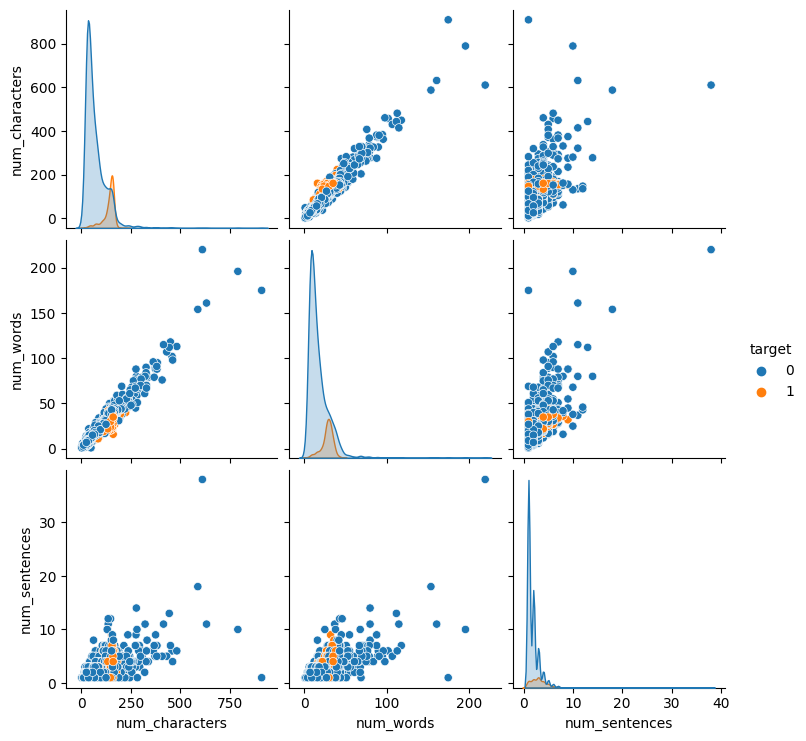

In [26]:
sns.pairplot(spam_data,hue='target')

C:\Users\Basic\AppData\Local\Temp\ipykernel_3996\3970829505.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam_data.corr(),annot=True)


<AxesSubplot: >

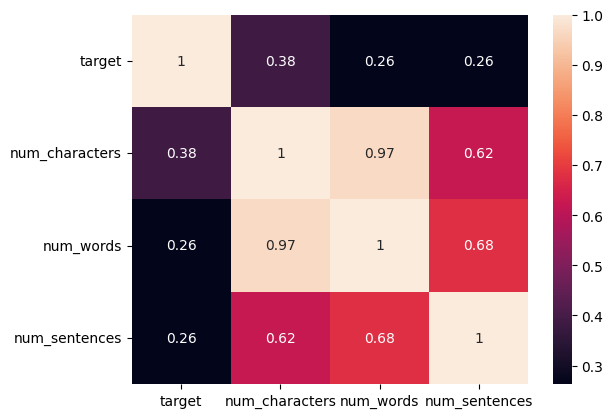

In [27]:
sns.heatmap(spam_data.corr(),annot=True)

we note that here numchar,numword,numsent are highly colinear to each other so we kept only one column which is more colinear to target and that is num_char column.

3. Data Preprocessing
Lower case
Tokenization
Removing Special Characters
Removing stop words and punctuation
Stemming

In [28]:
from nltk.corpus import stopwords

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Basic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import string

In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [32]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [33]:
spam_data['transform_text'] = spam_data['text'].apply(transform_text)

In [34]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [35]:
spam_wc = wc.generate(spam_data[spam_data['target']==1]['transform_text'].str.cat(sep=' '))

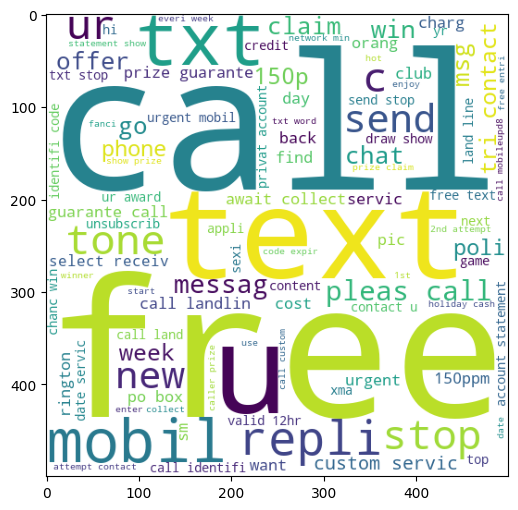

In [36]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [37]:
ham_wc = wc.generate(spam_data[spam_data['target']==0]['transform_text'].str.cat(sep=' '))

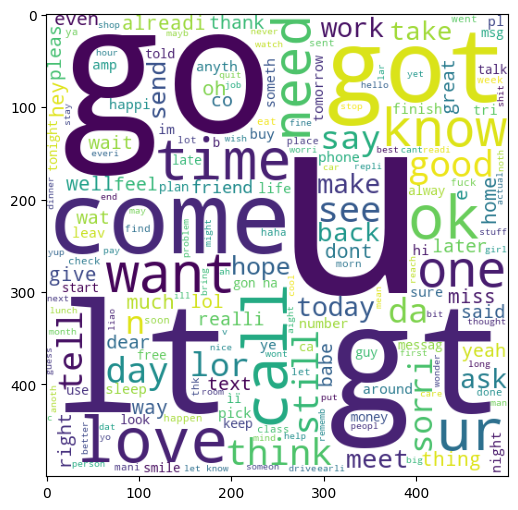

In [38]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [39]:
spam_corpus = []
for msg in spam_data[spam_data['target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

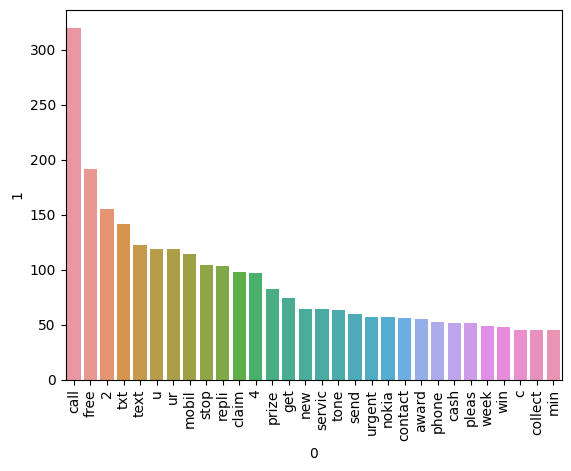

In [41]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus = []
for msg in spam_data[spam_data['target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

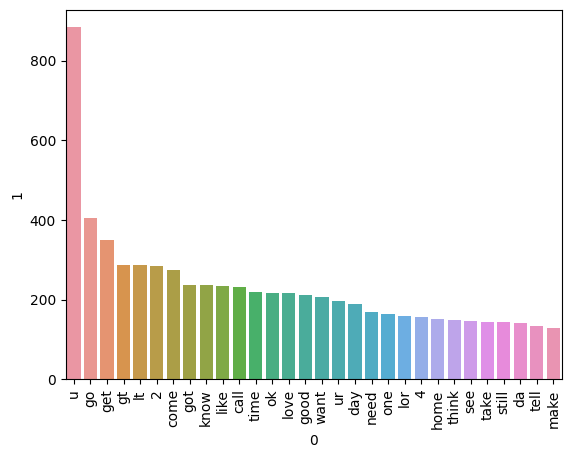

In [43]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4. Model Building

In [90]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [91]:
X = tfidf.fit_transform(spam_data['transform_text']).toarray()

In [92]:
X.shape

(5169, 3000)

In [93]:
y = spam_data['target'].values

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [96]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [97]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [98]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [99]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [100]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


tfidf --> mnb

Checking Multiple Algos. 

In [78]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier



In [79]:
# svc = SVC(kernel='sigmoid',gamma=1.0)
# knc = KNeighborsClassifier()
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear',penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50,random_state=2)
# abc = AdaBoostClassifier(n_estimators=50,random_state=2)
# bc = BaggingClassifier(n_estimators=50,random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
# gdbt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)


In [80]:
# clfs = {
#     'SVC' : svc,
#     'KN':knc,
#     "NB":mnb,
#     "DT":dtc,
#     "LR":lrc,
#     "RF":rfc,
#     "AdaBoost":abc,
#     'Bgc':bc,
#     'ETC':etc,
#     'GBDT':gdbt,
#     'xgb' : xgb
# }

In [81]:
# def train_classifier(clf,x_train,y_train,x_test,y_test):
#     clf.fit(x_train,y_train)
#     y_pred = clf.predict(x_test)
#     accuracy = accuracy_score(y_test,y_pred)
#     precision = precision_score(y_test,y_pred)

#     return accuracy,precision

In [ ]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
#     current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)
#     print("For ",name)
#     print("Accuracy ",current_accuracy)
#     print("Precision ",current_precision)

#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [ ]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [101]:
# Take Algo & Functions
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [104]:
print(type(transform_text))

<class 'function'>
